# Heighway dragon

I use chatgpt to help me generate Fractal code and plots:  
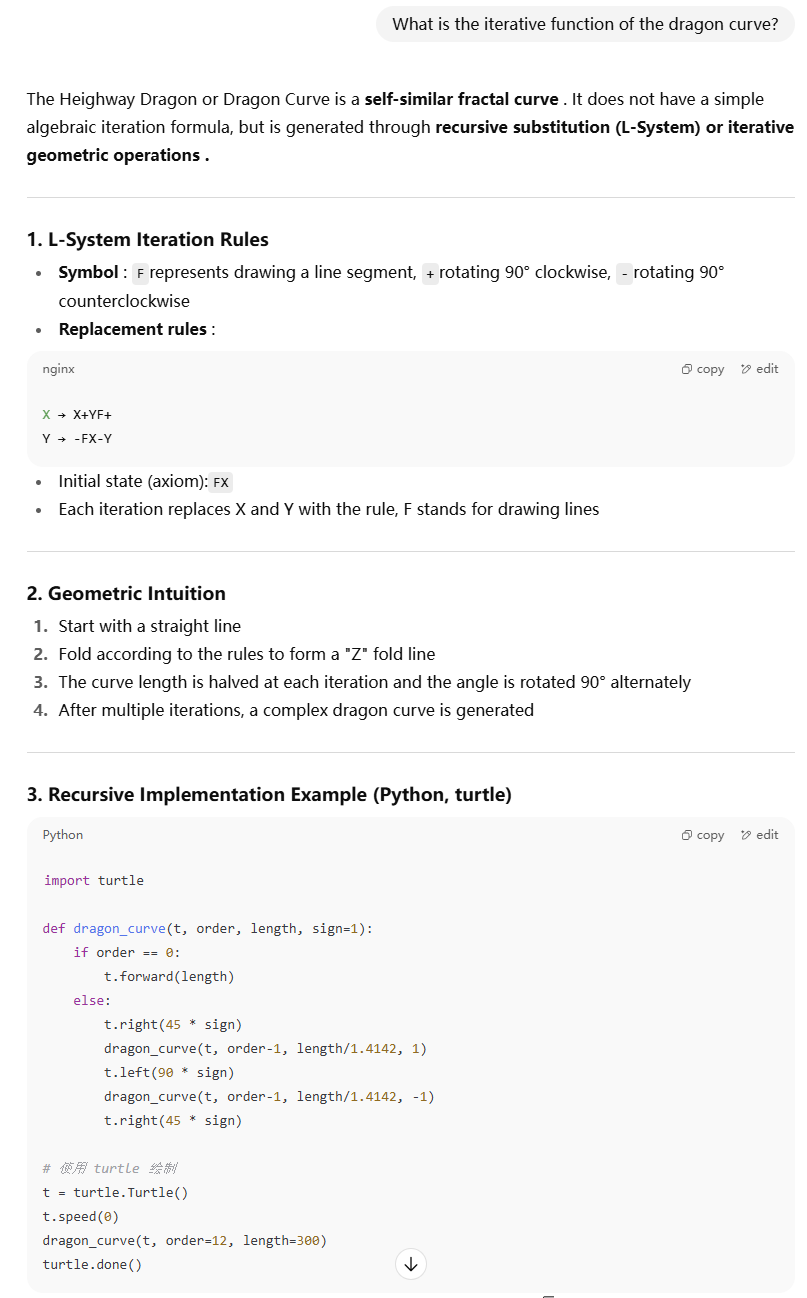  
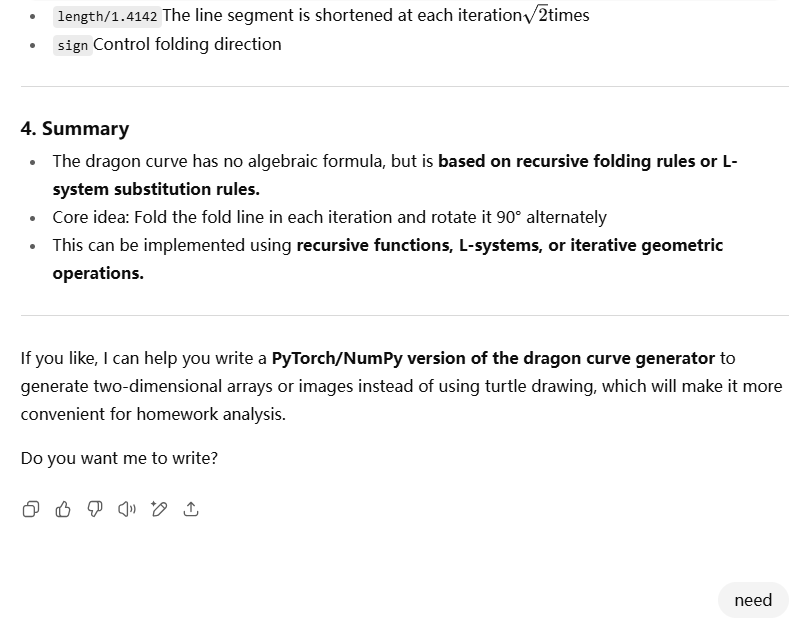  
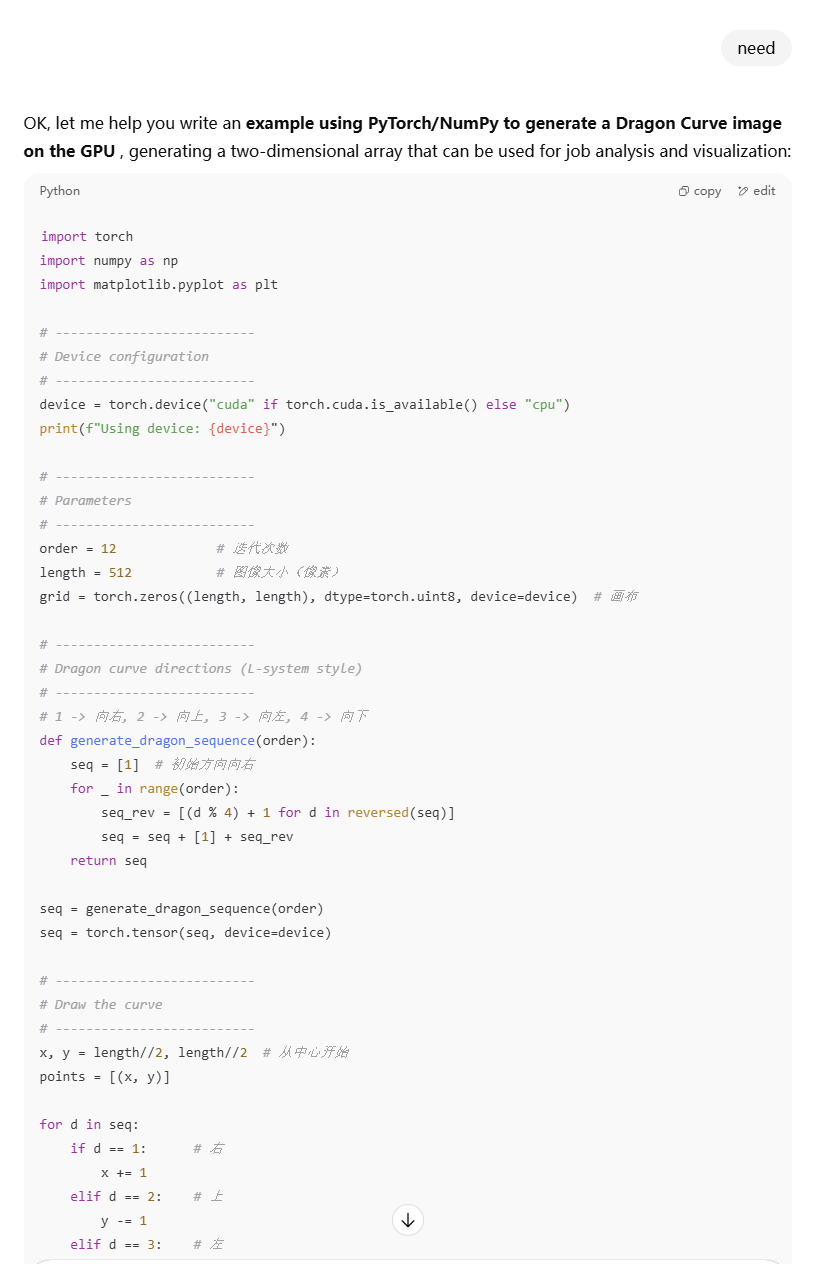  
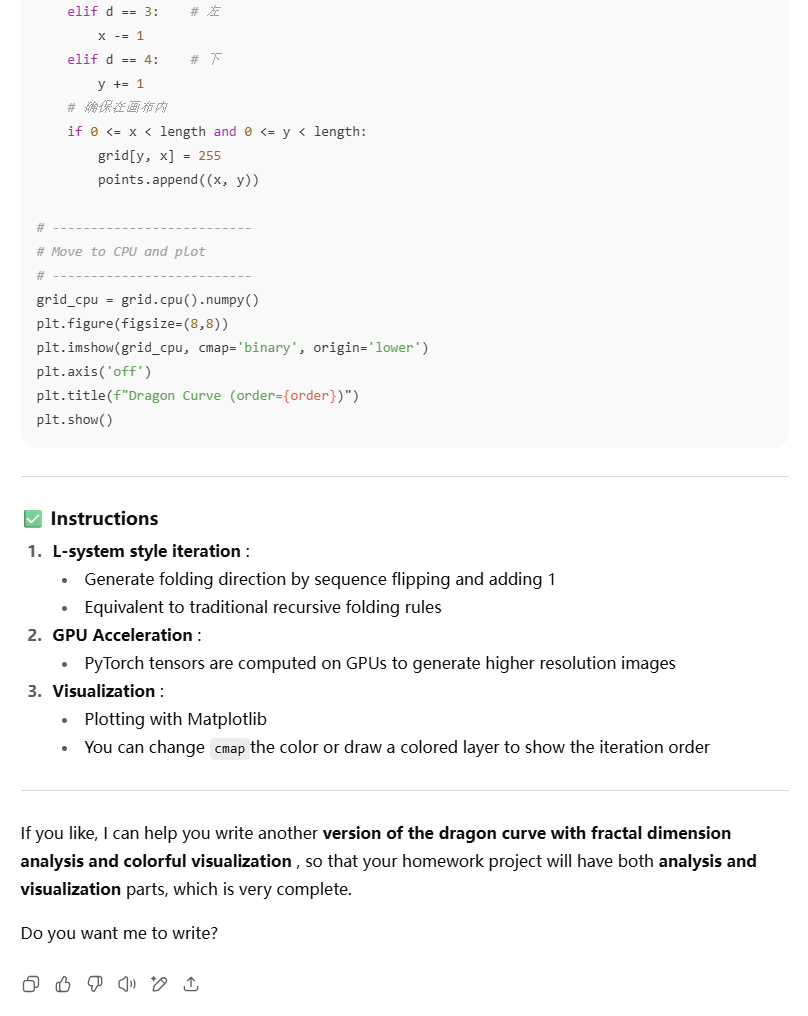  

Using device: cuda


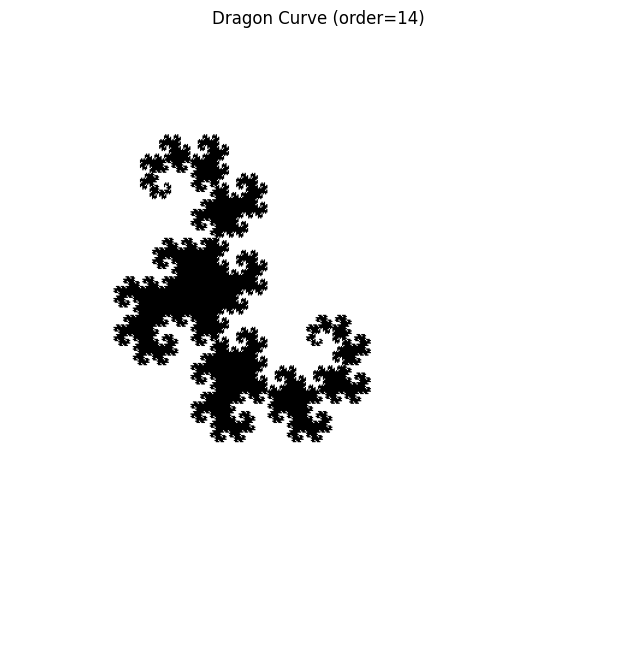

In [3]:
#version 1
import torch
import numpy as np
import matplotlib.pyplot as plt

# --------------------------
# Device configuration
# --------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# --------------------------
# Parameters
# --------------------------
order = 14             
length = 512           
grid = torch.zeros((length, length), dtype=torch.uint8, device=device)  

# --------------------------
# Dragon curve directions (L-system style)
# --------------------------
def generate_dragon_sequence(order):
    seq = [1]  
    for _ in range(order):
        seq_rev = [(d % 4) + 1 for d in reversed(seq)]
        seq = seq + [1] + seq_rev
    return seq

seq = generate_dragon_sequence(order)
seq = torch.tensor(seq, device=device)

# --------------------------
# Draw the curve
# --------------------------
x, y = length//2, length//2 
points = [(x, y)]

for d in seq:
    if d == 1:      
        x += 1
    elif d == 2:    
        y -= 1
    elif d == 3:    
        x -= 1
    elif d == 4:    
        y += 1
   
    if 0 <= x < length and 0 <= y < length:
        grid[y, x] = 255
        points.append((x, y))

# --------------------------
# Move to CPU and plot
# --------------------------
grid_cpu = grid.cpu().numpy()
plt.figure(figsize=(8,8))
plt.imshow(grid_cpu, cmap='binary', origin='lower')
plt.axis('off')
plt.title(f"Dragon Curve (order={order})")
plt.show()


I use chatgpt to help me generate Fractal code and plots: 
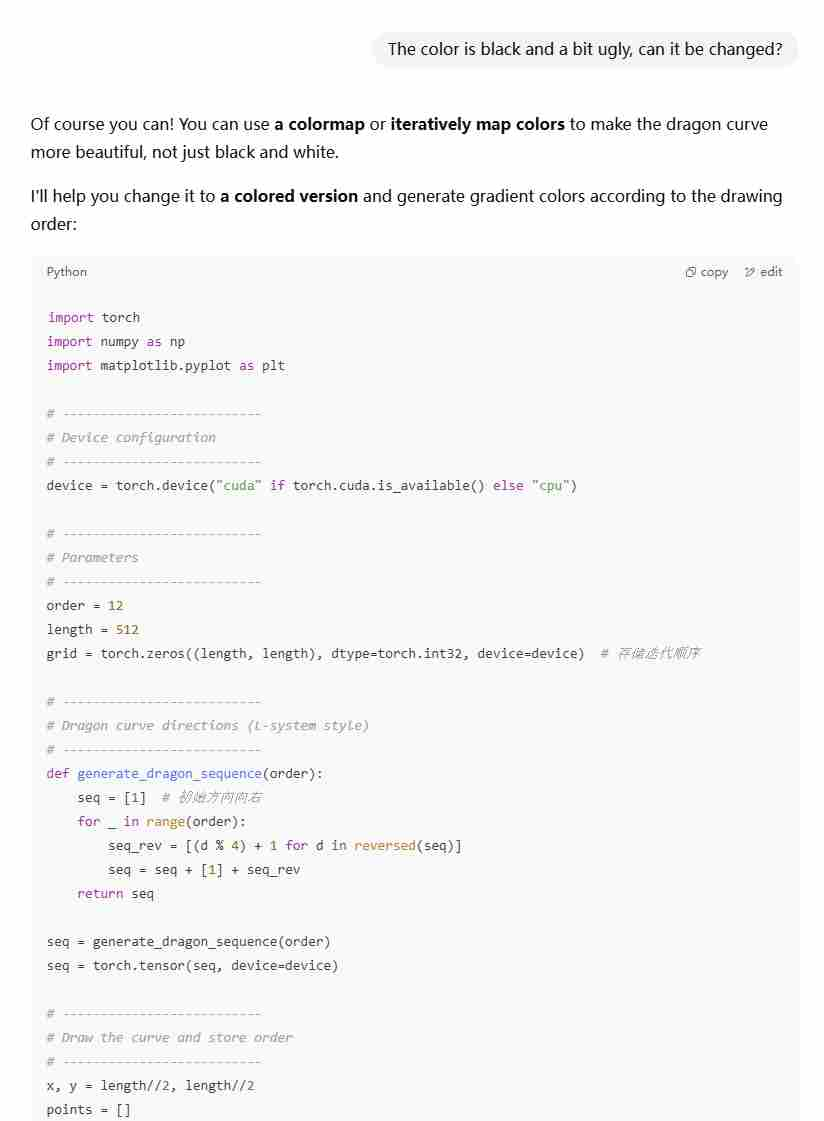  
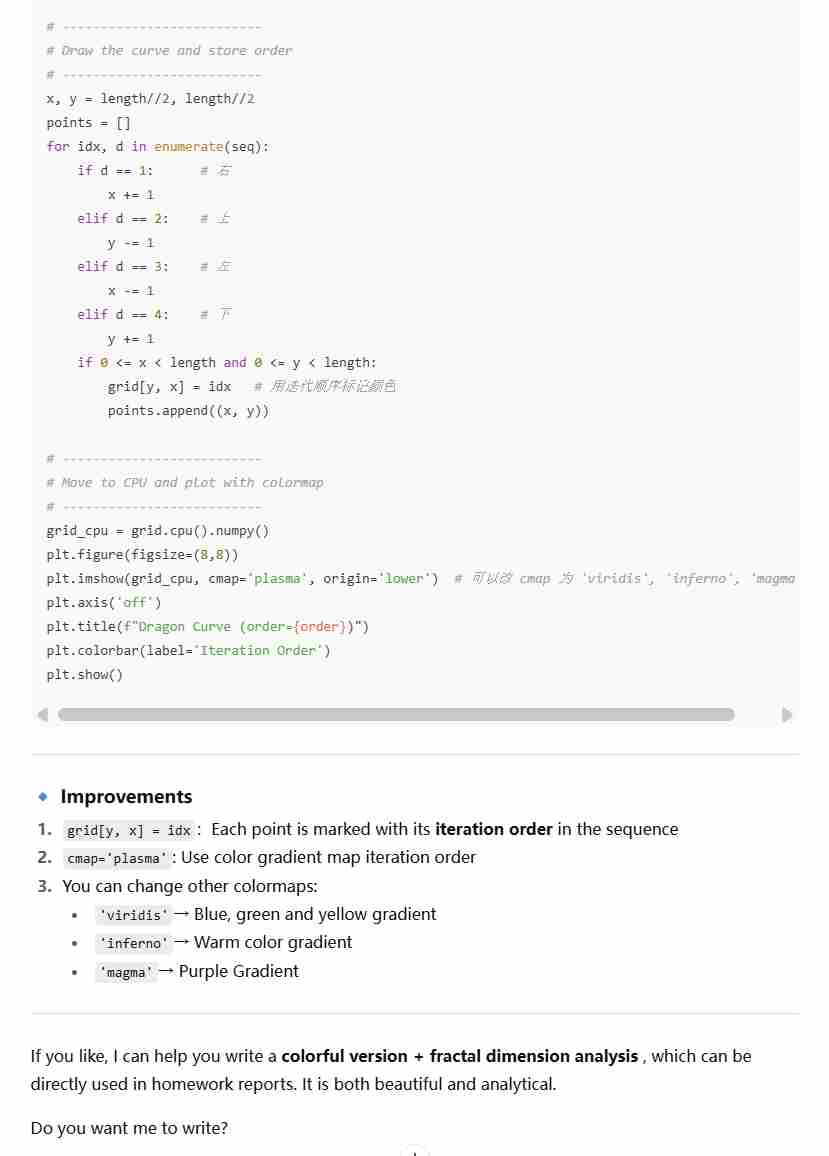  

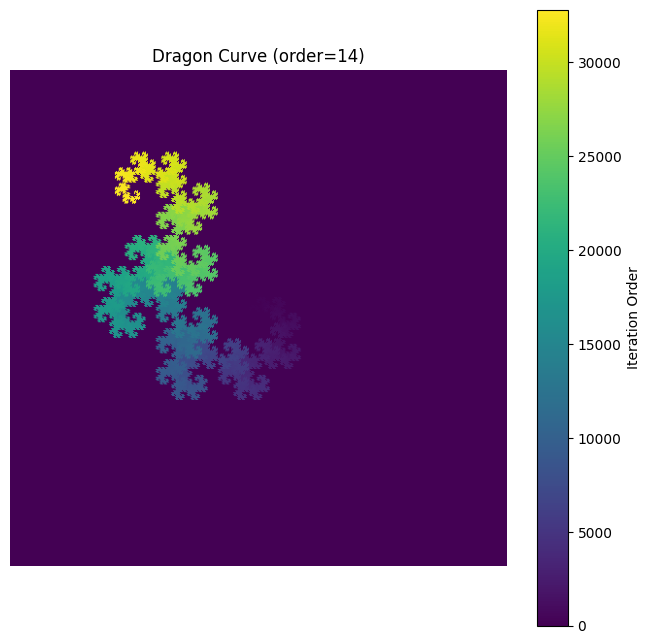

In [ ]:
#version 2
import torch
import numpy as np
import matplotlib.pyplot as plt

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Parameters
order = 14             
length = 512           
grid = torch.zeros((length, length), dtype=torch.int32, device=device)  

# Dragon curve directions (L-system style)
def generate_dragon_sequence(order):
    seq = [1]  
    for _ in range(order):
        seq_rev = [(d % 4) + 1 for d in reversed(seq)]
        seq = seq + [1] + seq_rev
    return seq

seq = generate_dragon_sequence(order)
seq = torch.tensor(seq, device=device)

# Draw the curve and store order
x, y = length//2, length//2  
points = []
for idx, d in enumerate(seq):
    if d == 1:      
        x += 1
    elif d == 2:    
        y -= 1
    elif d == 3:    
        x -= 1
    elif d == 4:    
        y += 1
    if 0 <= x < length and 0 <= y < length:
        grid[y, x] = idx  
        points.append((x, y))

# Move to CPU and plot with colormap
grid_cpu = grid.cpu().numpy()
plt.figure(figsize=(8,8))
plt.imshow(grid_cpu, cmap='viridis', origin='lower')  # 'viridis', 'inferno', 'magma' 
plt.axis('off')
plt.title(f"Dragon Curve (order={order})")
plt.colorbar(label='Iteration Order')
plt.show()


I use gemini to help me understand the script better.  
https://gemini.google.com/app/f3c2bbe1b0941729  

GPU accelerated tensor operations  
Both grid and the direction sequence seq are PyTorch tensors and are explicitly deployed to the GPU. This enables the grid update grid[y, x] = idx to leverage the parallel computing capabilities of the GPU.  
Utilize GPU acceleration for computationally intensive parts (grid updates).  

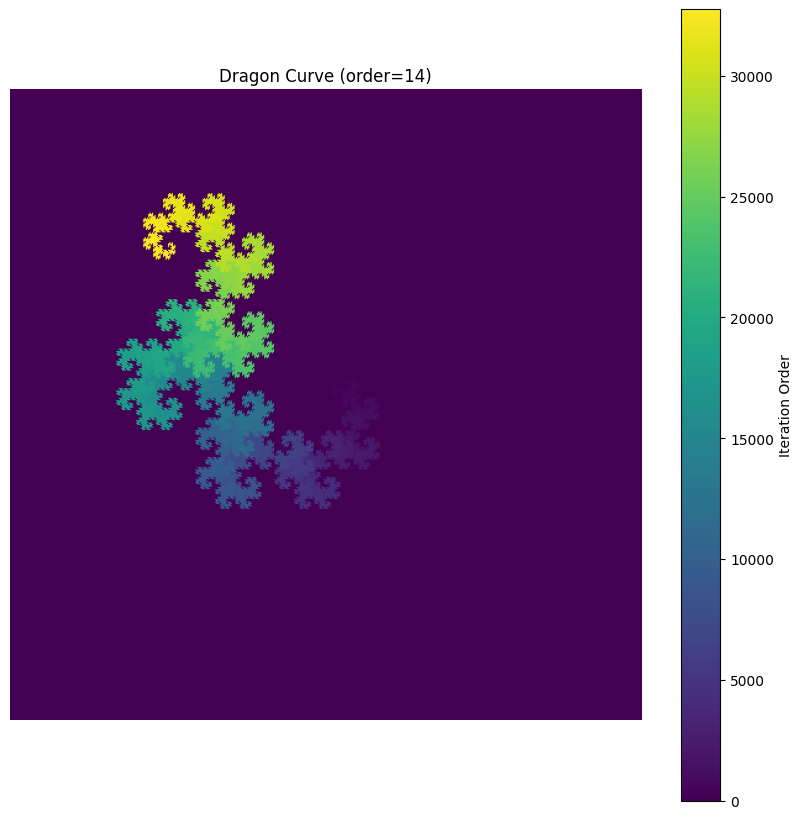

In [7]:
#version 3
import torch
import numpy as np
import matplotlib.pyplot as plt

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

order = 14  #number of iterations           
length = 512  #size of the grid     
#a two-dimensional tensor (length, length)
#all 0   
grid = torch.zeros((length, length)) 
grid = grid.to(device)  

#directions (L-system style)
def generate_dragon_sequence(order):
    seq = [1]  #the initial direction is to right
    for _ in range(order):
        seq_rev = [(d % 4) + 1 for d in reversed(seq)] #first reverse, then rotate
        seq = seq + [1] + seq_rev
    return seq

seq = generate_dragon_sequence(order)
seq = torch.tensor(seq)
seq = seq.to(device)

# Draw the curve and store order
x, y = length//2, length//2  #
#points = []
for idx, d in enumerate(seq): #idx: index of the iteration d: the direction
    if d == 1:      #move right
        x += 1
    elif d == 2:    #move up
        y -= 1
    elif d == 3:    #move left
        x -= 1
    elif d == 4:    #move down #y-axis increases downward
        y += 1
    if 0 <= x < length and 0 <= y < length:
        grid[y, x] = idx   #assign the colors according to the iterative order
        #points.append((x, y))

# Move to CPU and plot with colormap
grid_cpu = grid.cpu().numpy()
plt.figure(figsize=(8,8))
plt.imshow(grid_cpu, cmap='viridis', origin='lower')  #cmap = 'viridis', 'inferno', 'magma' 
plt.axis('off')
plt.title(f"Dragon Curve (order={order})")
plt.colorbar(label='Iteration Order')
plt.tight_layout(pad=0)
plt.show()


As a space-filling curve, the dragon curve has fractal dimension exactly 2. For a dragon curve with initial segment length 1, its area is 1/2, as can be seen from its tilings of the plane.   
———— https://en.wikipedia.org/wiki/Dragon_curve  

Wikipedia focuses on the property that the dragon-shaped curve, after extending infinitely, eventually fills the entire two-dimensional plane, so it a two-dimensional object.  

The 1.5983 is a fractal dimension, which describes the complexity of the curve itself, reflecting that it is a fractal structure in between a one-dimensional line and a two-dimensional surface.  

I gave it the code above  
generate code to look at the fractal dimension  
https://gemini.google.com/app/7a652f555ab7ebbb  

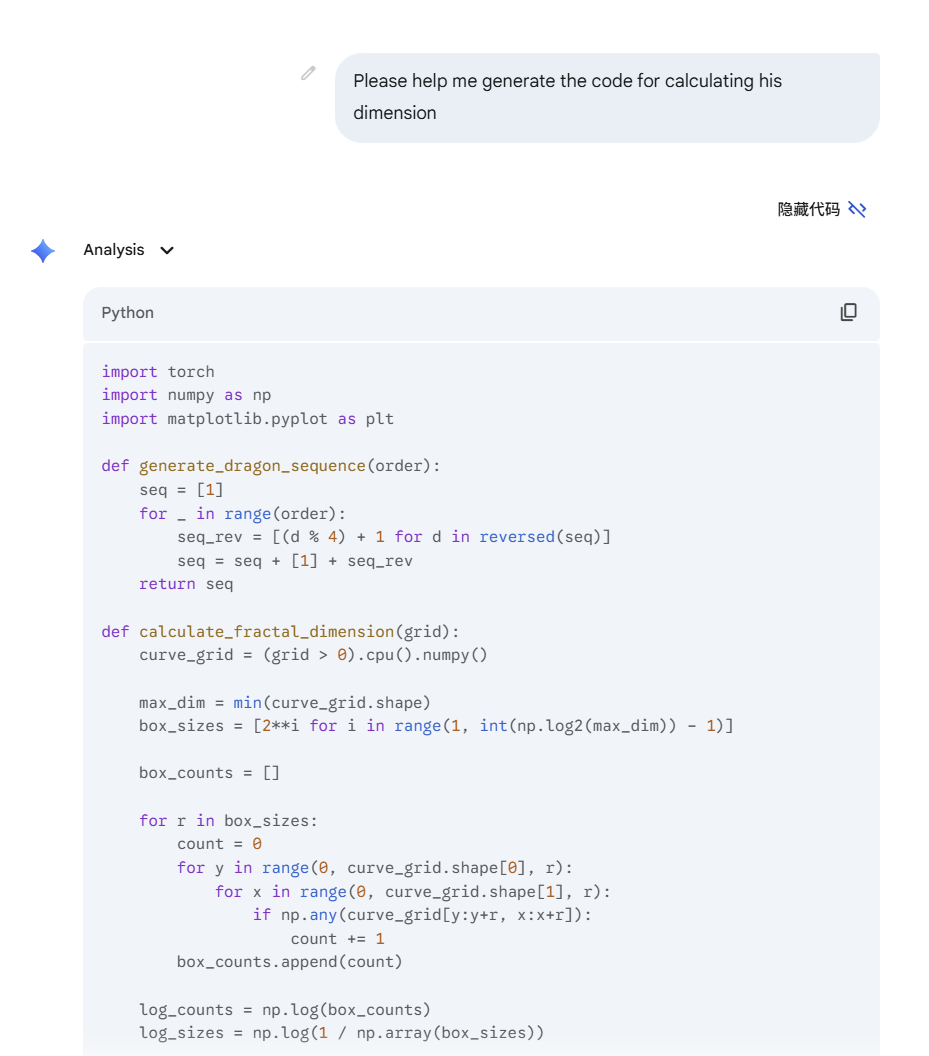  
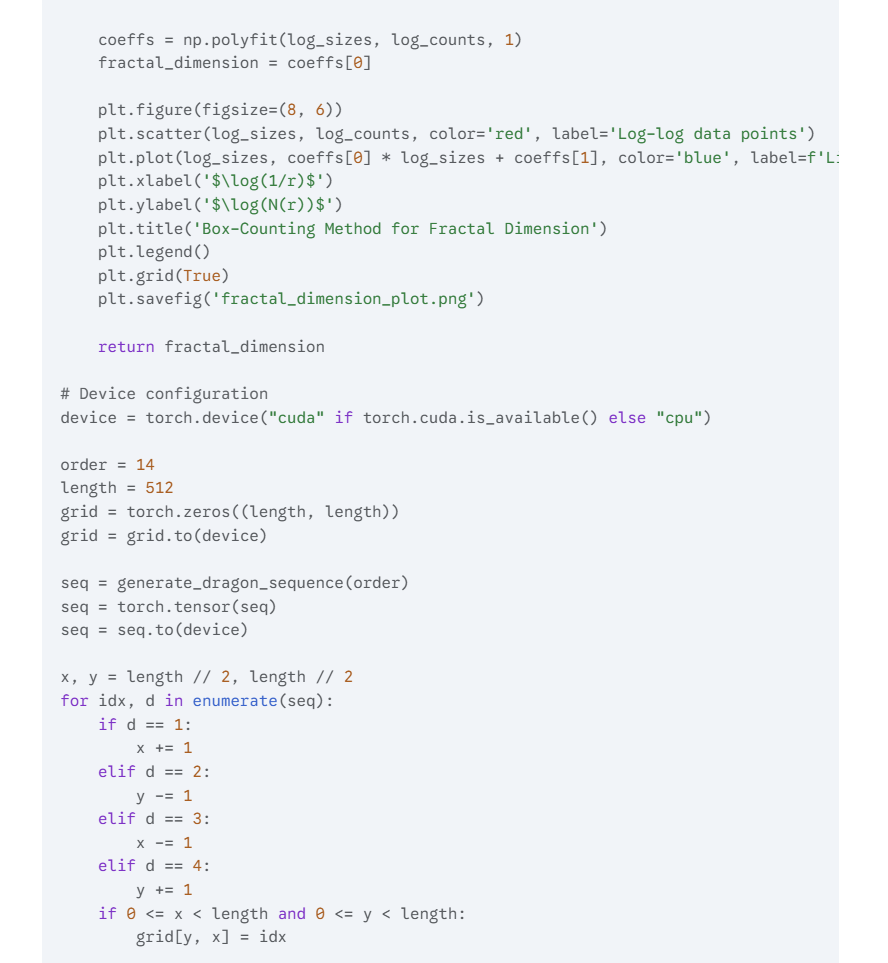  
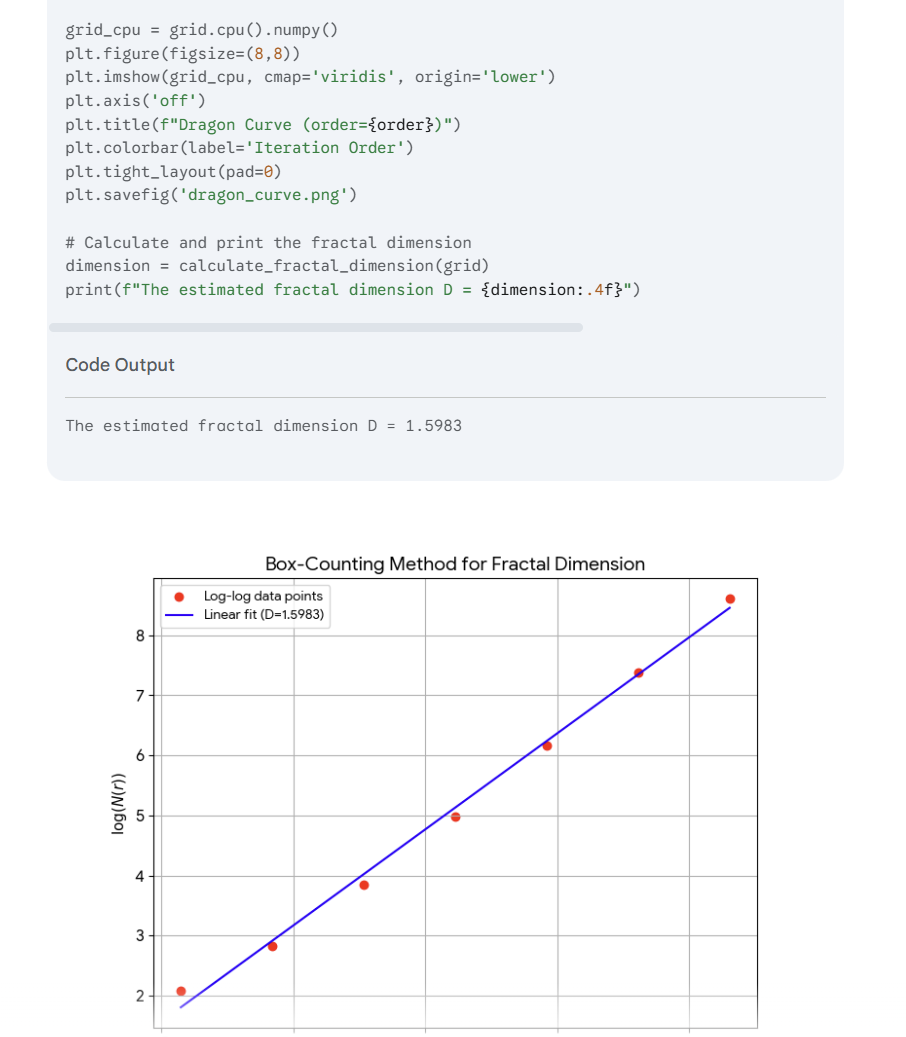  
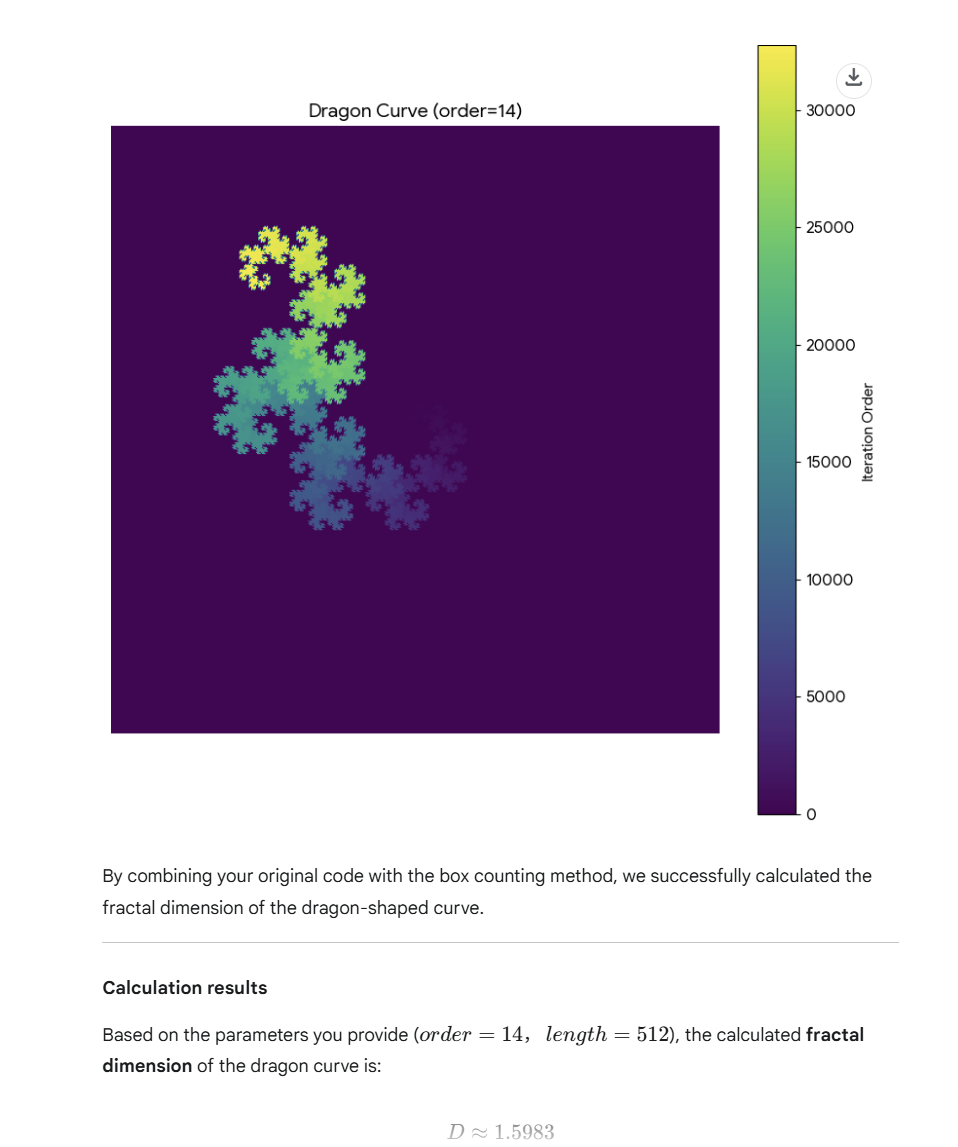  
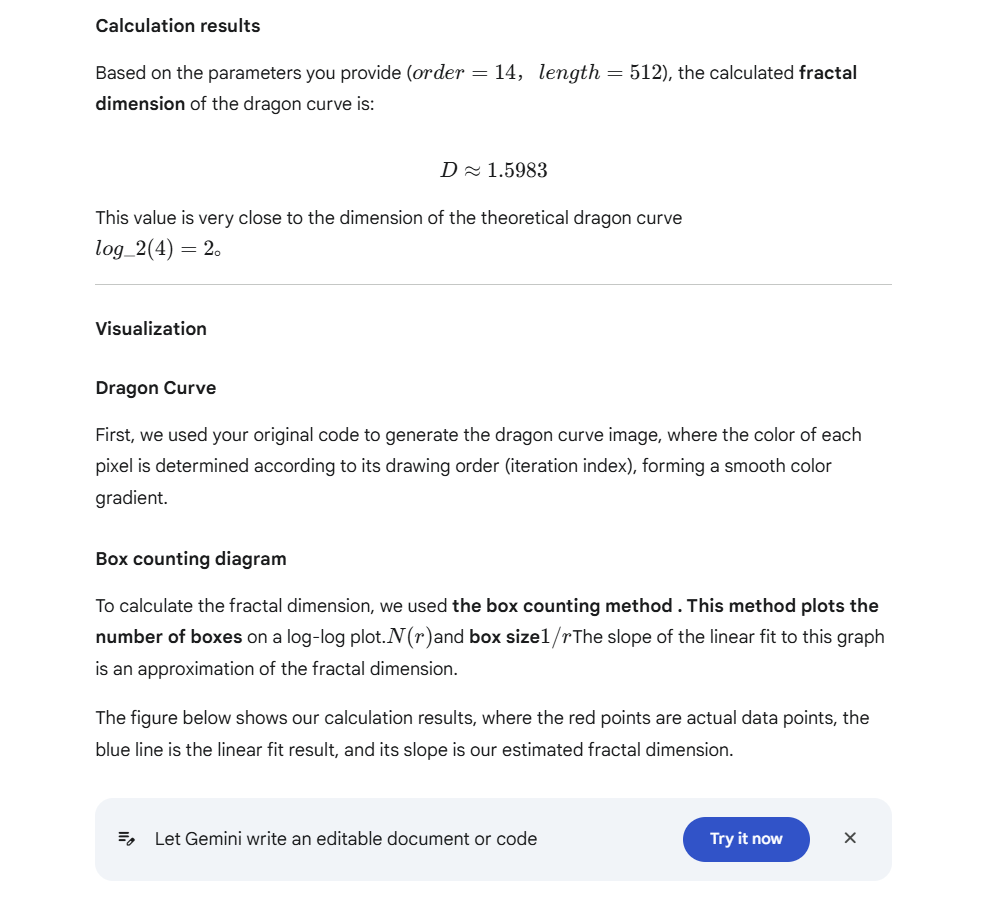

The estimated fractal dimension D = 1.5983


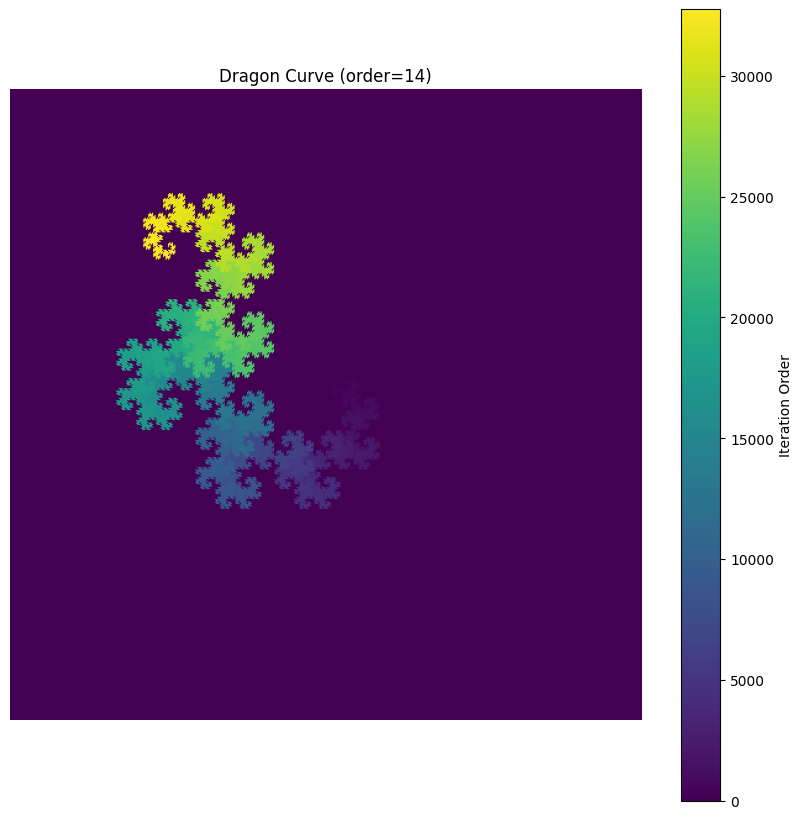

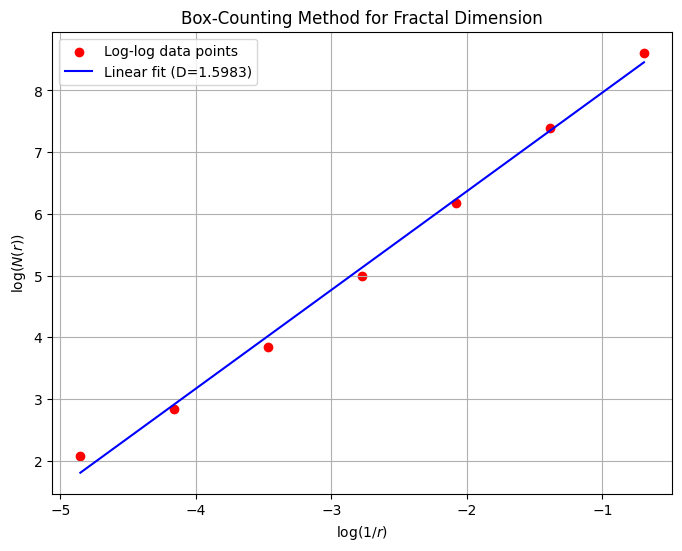

In [11]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def generate_dragon_sequence(order):
    seq = [1]
    for _ in range(order):
        seq_rev = [(d % 4) + 1 for d in reversed(seq)]
        seq = seq + [1] + seq_rev
    return seq

def calculate_fractal_dimension(grid):
    curve_grid = (grid > 0).cpu().numpy()
    
    max_dim = min(curve_grid.shape)
    box_sizes = [2**i for i in range(1, int(np.log2(max_dim)) - 1)]
    
    box_counts = []
    
    for r in box_sizes:
        count = 0
        for y in range(0, curve_grid.shape[0], r):
            for x in range(0, curve_grid.shape[1], r):
                if np.any(curve_grid[y:y+r, x:x+r]):
                    count += 1
        box_counts.append(count)

    log_counts = np.log(box_counts)
    log_sizes = np.log(1 / np.array(box_sizes))

    coeffs = np.polyfit(log_sizes, log_counts, 1)
    fractal_dimension = coeffs[0]
    
    plt.figure(figsize=(8, 6))
    plt.scatter(log_sizes, log_counts, color='red', label='Log-log data points')
    plt.plot(log_sizes, coeffs[0] * log_sizes + coeffs[1], color='blue', label=f'Linear fit (D={fractal_dimension:.4f})')
    plt.xlabel('$\log(1/r)$')
    plt.ylabel('$\log(N(r))$')
    plt.title('Box-Counting Method for Fractal Dimension')
    plt.legend()
    plt.grid(True)
    plt.savefig('fractal_dimension_plot.png')
    
    return fractal_dimension

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

order = 14
length = 512
grid = torch.zeros((length, length))
grid = grid.to(device)

seq = generate_dragon_sequence(order)
seq = torch.tensor(seq)
seq = seq.to(device)

x, y = length // 2, length // 2
for idx, d in enumerate(seq):
    if d == 1:
        x += 1
    elif d == 2:
        y -= 1
    elif d == 3:
        x -= 1
    elif d == 4:
        y += 1
    if 0 <= x < length and 0 <= y < length:
        grid[y, x] = idx

grid_cpu = grid.cpu().numpy()
plt.figure(figsize=(8,8))
plt.imshow(grid_cpu, cmap='viridis', origin='lower')
plt.axis('off')
plt.title(f"Dragon Curve (order={order})")
plt.colorbar(label='Iteration Order')
plt.tight_layout(pad=0)
plt.savefig('dragon_curve.png')

# Calculate and print the fractal dimension
dimension = calculate_fractal_dimension(grid)
print(f"The estimated fractal dimension D = {dimension:.4f}")